<a href="https://colab.research.google.com/github/Jatinpalsingh/Jatinpal/blob/main/Covid19_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
from google.colab import files # Use to load data on Google Colab 
uploaded = files.upload()

Saving district_level_latest.csv to district_level_latest (1).csv


In [ ]:
#Load the data into the data frame
df = pd.read_csv('district_level_latest (1).csv')
df.head(7)


,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,District_Notes,Last_Updated
0,1,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobars,0,0,0,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
1,2,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,1,0,1,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
2,3,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,51,19,32,0,0,0,0,0,0,District-wise numbers are out-dated as cumulat...,NaN
3,0,AP,Andhra Pradesh,AP_Foreign Evacuees,Foreign Evacuees,434,0,434,0,0,0,0,0,0,NaN,NaN
4,4,AP,Andhra Pradesh,AP_Anantapur,Anantapur,21173,6768,14263,142,0,1112,-494,1596,10,NaN,NaN
5,5,AP,Andhra Pradesh,AP_Chittoor,Chittoor,14306,6215,7948,143,0,755,251,496,8,NaN,NaN
6,6,AP,Andhra Pradesh,AP_East Godavari,East Godavari,27580,12583,14792,205,0,1351,973,368,10,NaN,NaN


In [ ]:
#Show all of the column names
df.columns.values

array(['SlNo', 'State_Code', 'State', 'District_Key', 'District',
       'Confirmed', 'Active', 'Recovered', 'Deceased', 'Migrated_Other',
       'Delta_Confirmed', 'Delta_Active', 'Delta_Recovered',
       'Delta_Deceased', 'District_Notes', 'Last_Updated'], dtype=object)

In [ ]:
#Check for na or missing data
df.isna().sum()

SlNo                 0
State_Code           0
State                0
District_Key         0
District             0
Confirmed            0
Active               0
Recovered            0
Deceased             0
Migrated_Other       0
Delta_Confirmed      0
Delta_Active         0
Delta_Recovered      0
Delta_Deceased       0
District_Notes     739
Last_Updated       799
dtype: int64

In [ ]:
#Show statistics on the current data 
df.describe()

,SlNo,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,Last_Updated
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,0.0
mean,373.261577,2534.929912,758.322904,1723.884856,52.112641,0.568210,74.361702,15.392991,57.881101,1.087610,NaN
std,229.743330,9949.351249,3443.644426,7785.223785,329.680885,10.579573,205.172085,155.364462,238.441472,4.311764,NaN
min,0.000000,0.000000,-51654.000000,0.000000,0.000000,0.000000,-5.000000,-3394.000000,-3.000000,-2.000000,NaN
25%,173.500000,192.000000,49.500000,69.500000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,NaN
50%,373.000000,630.000000,211.000000,379.000000,4.000000,0.000000,17.000000,2.000000,8.000000,0.000000,NaN
75%,572.500000,1616.000000,549.500000,990.500000,17.000000,0.000000,65.000000,26.000000,33.000000,0.500000,NaN
max,766.000000,140743.000000,41121.000000,127124.000000,6648.000000,297.000000,3091.000000,1615.000000,4650.000000,62.000000,NaN


In [ ]:
Cleaned_df = df.drop(['SlNo','State_Code','District_Key','Delta_Confirmed','Delta_Active','Delta_Recovered','Delta_Deceased','District_Notes','Last_Updated'],axis=1)

In [ ]:
Cleaned_df.shape

(799, 7)

In [ ]:
Cleaned_df.head(10)

,State,District,Confirmed,Active,Recovered,Deceased,Migrated_Other
0,Andaman and Nicobar Islands,Nicobars,0,0,0,0,0
1,Andaman and Nicobar Islands,North and Middle Andaman,1,0,1,0,0
2,Andaman and Nicobar Islands,South Andaman,51,19,32,0,0
3,Andhra Pradesh,Foreign Evacuees,434,0,434,0,0
4,Andhra Pradesh,Anantapur,21173,6768,14263,142,0
5,Andhra Pradesh,Chittoor,14306,6215,7948,143,0
6,Andhra Pradesh,East Godavari,27580,12583,14792,205,0
7,Andhra Pradesh,Guntur,19419,7224,12007,188,0
8,Andhra Pradesh,Krishna,9042,3012,5832,198,0
9,Andhra Pradesh,Kurnool,23348,9811,13314,223,0


In [ ]:
#Show statistics on the current data 
Cleaned_df.describe()

,Confirmed,Active,Recovered,Deceased,Migrated_Other
count,799.000000,799.000000,799.000000,799.000000,799.000000
mean,2534.929912,758.322904,1723.884856,52.112641,0.568210
std,9949.351249,3443.644426,7785.223785,329.680885,10.579573
min,0.000000,-51654.000000,0.000000,0.000000,0.000000
25%,192.000000,49.500000,69.500000,0.000000,0.000000
50%,630.000000,211.000000,379.000000,4.000000,0.000000
75%,1616.000000,549.500000,990.500000,17.000000,0.000000
max,140743.000000,41121.000000,127124.000000,6648.000000,297.000000


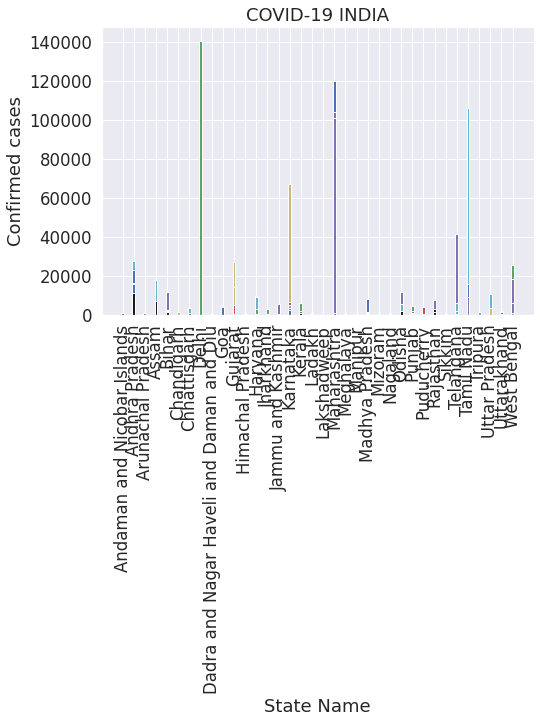

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df['State'],df['Confirmed'], color = list('rgbkymc'), width = 0.25)
plt.title('COVID-19 INDIA')
plt.xticks(rotation=90)
plt.xlabel('State Name')
plt.ylabel('Confirmed cases')
plt.show()

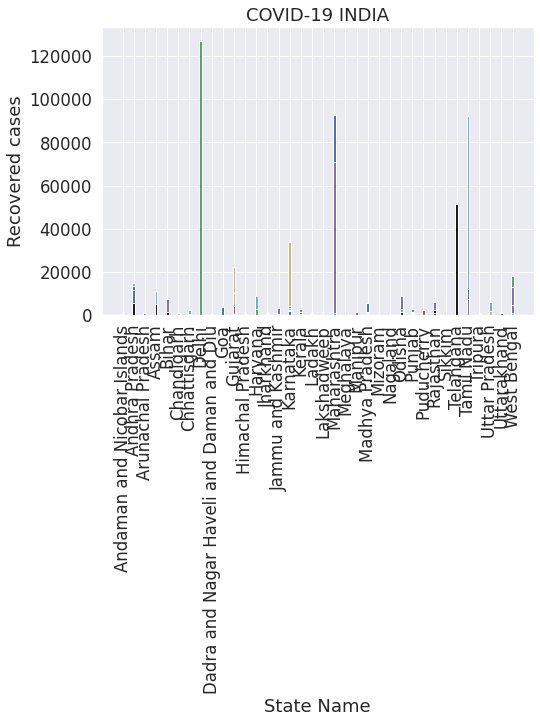

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df['State'],df['Recovered'], color = list('rgbkymc'), width = 0.25)
plt.title('COVID-19 INDIA')
plt.xticks(rotation=90)
plt.xlabel('State Name')
plt.ylabel('Recovered cases')
plt.show()

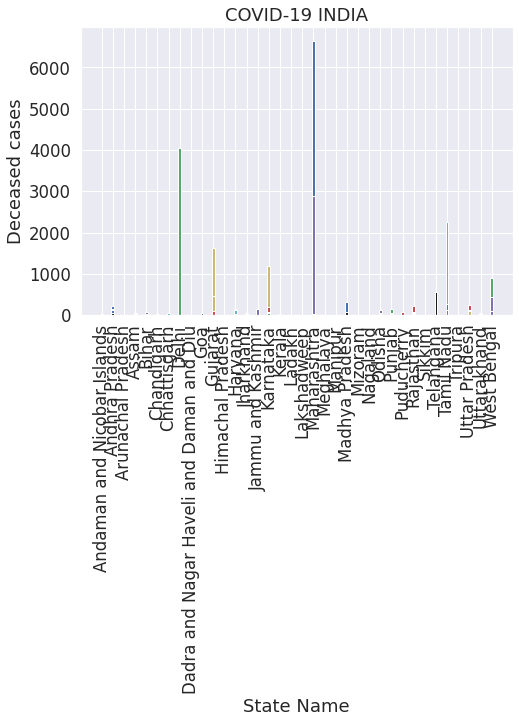

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df['State'],df['Deceased'], color = list('rgbkymc'), width = 0.25)
plt.title('COVID-19 INDIA')
plt.xticks(rotation=90)
plt.xlabel('State Name')
plt.ylabel('Deceased cases')
plt.show()

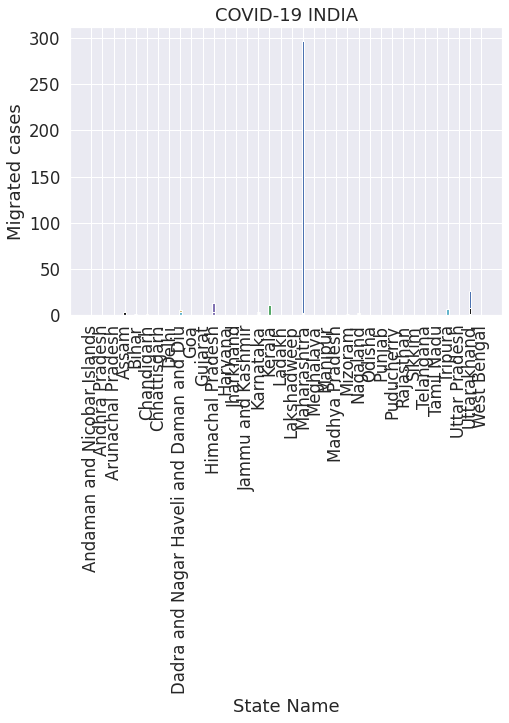

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df['State'],df['Migrated_Other'], color = list('rgbkymc'), width = 0.25)
plt.title('COVID-19 INDIA')
plt.xticks(rotation=90)
plt.xlabel('State Name')
plt.ylabel('Migrated cases')
plt.show()

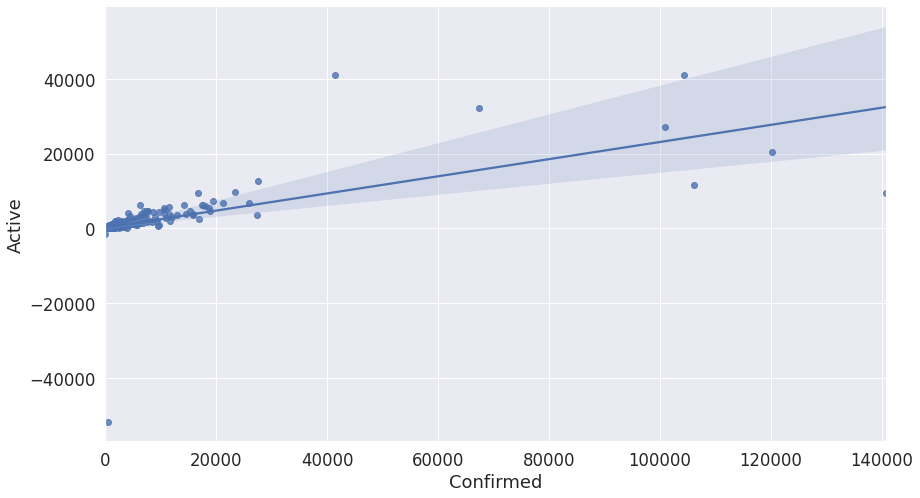

In [ ]:
plt.figure(figsize=(14,8)) # set the size of the graph
_ = sns.regplot(data=df, x='Confirmed', y='Active')

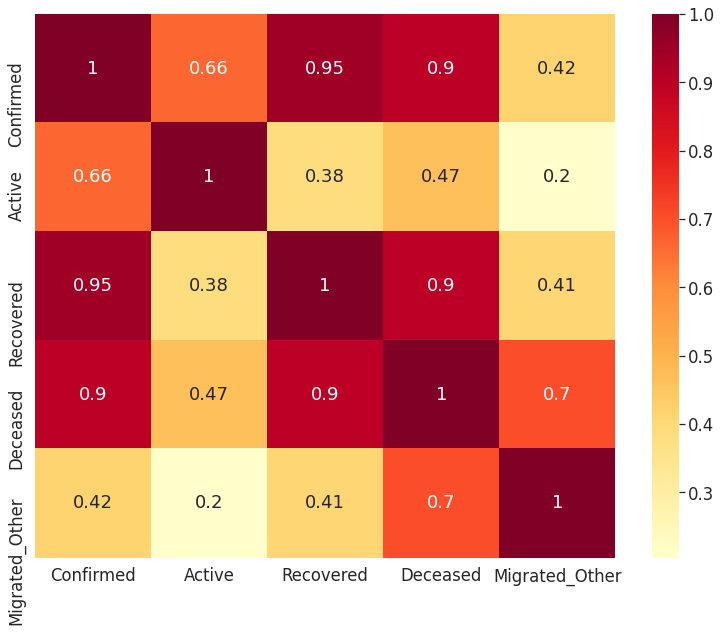

In [ ]:
# create tabular correlation matrix
corr = Cleaned_df.corr()
_, ax = plt.subplots(figsize=(13,10)) 

# graph correlation matrix
_ = sns.heatmap(corr, ax=ax,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                cmap='YlOrRd',annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
#from sklearn.datasets import load_iris
X = Cleaned_df[['Confirmed','Recovered','Deceased','Migrated_Other']]
Y = Cleaned_df['Active']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.02)

In [ ]:
from sklearn import linear_model

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)
regr.score(x_test,y_test)

0.9999999997295734

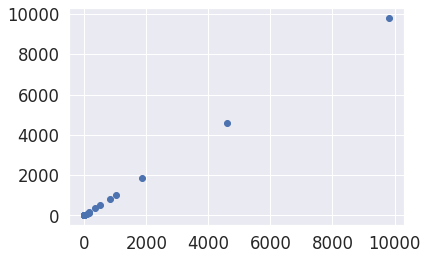

In [ ]:
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import confusion_matrix

model= LinearRegression().fit(x_train,y_train)
predictions=model.predict(x_test)
#import matplotlib.pyplot as plt
#cnf_matrix = confusion_matrix(y_test, predictions)
#print(cnf_matrix)

plt.scatter(y_test,predictions)

In [ ]:
predictions = model.predict(x_test)

In [ ]:
print(predictions)

[-4.49073120e-02  4.58796436e+03  1.85795982e+03 -4.49024380e-02
 -4.49236417e-02  3.44955838e+02  1.39955418e+02  8.21957348e+02
  8.79555377e+01  1.49957110e+02 -4.48870867e-02  9.81098779e+03
  2.95511363e+00  5.95512483e+00  1.03396152e+03  5.07957439e+02]


In [ ]:
from sklearn.linear_model import LinearRegression 
P = Cleaned_df[['Confirmed','Deceased']] # here we have 2 major independant factors
Q = df['Active']  # Dependant variable.
# with sklearn
selectregr = linear_model.LinearRegression()
selectregr.fit(P, Q)
selectregr.score(P, Q)

0.5278556845275865

In [ ]:
predictedactive = selectregr.predict([[20000, 200]])

print(predictedactive)

[7422.22435071]
